TODO: add comments for all functions

In [41]:
import csv
import os

import rdflib

import networkx as nx
from matplotlib import pyplot as plt

In [42]:
SAVE_PATH = f"{os.getcwd()}/flat_kg.csv"

In [28]:
def get_all_triples(kg, allow_literals: bool = False):
    optional_literal_filter = ""
    if not allow_literals:
        optional_literal_filter = "FILTER(!isLiteral(?object))"
    all_triple_query = f"""
    SELECT DISTINCT ?subject ?predicate ?object
    WHERE {{
        ?subject ?predicate ?object .
        {optional_literal_filter}
}}
"""
    all_triples = kg.query(all_triple_query)
    return all_triples

In [29]:
def flatten_kg(kg):
    triples = get_all_triples(kg, allow_literals=False)
    flat_graph = nx.DiGraph()
    for triple in triples:
        subj = triple.subject
        pred = triple.predicate
        obj = triple.object
        
        flat_graph.add_edge(subj, pred)
        flat_graph.add_edge(pred, obj)
    return flat_graph

In [30]:
def get_kg():
    # TODO: Implement a real kg here, not a test one
    g = rdflib.Graph()

    rdf_text = """@prefix foaf: <http://xmlns.com/foaf/0.1/> .
    @prefix um: <http://maastrichtuniversity.nl/> .
    
    um:Michel a um:Computer_Scientist ;
        foaf:firstName "Michel" ;
        foaf:lastName "Dumontier" .
    
    um:Rena a um:Teaching_Assistant ;
        foaf:firstName "Rena" ;
        foaf:lastName "Yang" .
    
    um:Rishab a um:Teaching_Assistant ;
        foaf:firstName "Rishab" ;
        foaf:lastName "Jakhar" .
    
    um:Shervin a um:Teaching_Assistant ;
        foaf:firstName "Shervin" ;
        foaf:lastName "Mehryar" .
    
    """
    
    g.parse(data=rdf_text,format="turtle")
    return g

In [31]:
def display_flattened_graph(flat_graph):
    nx.draw(flat_graph, with_labels=True)
    plt.show()

In [43]:
def save_graph(flat_graph):
    adj_matrix = nx.adjacency_matrix(flat_graph).todense()
    with open(SAVE_PATH, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(adj_matrix)

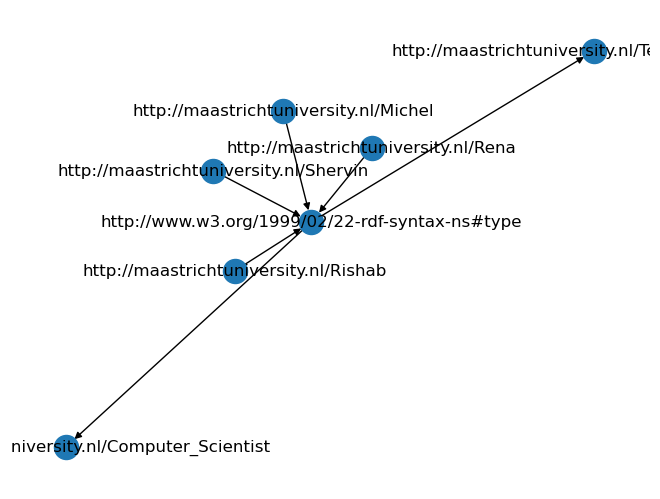

In [33]:
knowledge_graph = get_kg()
flattened_graph = flatten_kg(knowledge_graph)
display_flattened_graph(flattened_graph)

In [44]:
save_graph(flattened_graph)